In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import RobustScaler

In [2]:
data = pd.read_csv("elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv", sep=";")
data.head()

Melding ID Meldingstidspunkt Meldingsdato Meldingsklokkeslett  \
0     1497177        01.01.2018   01.01.2018               00:00   
1     1497178        01.01.2018   01.01.2018               00:00   
2     1497178        01.01.2018   01.01.2018               00:00   
3     1497178        01.01.2018   01.01.2018               00:00   
4     1497178        01.01.2018   01.01.2018               00:00   

     Starttidspunkt   Startdato Startklokkeslett Startposisjon bredde  \
0        31.12.2017  31.12.2017            00:00               -60,35   
1  30.12.2017 23:21  30.12.2017            23:21               74,885   
2  30.12.2017 23:21  30.12.2017            23:21               74,885   
3  30.12.2017 23:21  30.12.2017            23:21               74,885   
4  30.12.2017 23:21  30.12.2017            23:21               74,885   

  Startposisjon lengde  Hovedområde start (kode)  ...        Art - FDIR  \
0              -46,133                       NaN  ...  Antarktisk krill   
1               16,048                      20.0  ...              Hyse   
2               16,048                      20.0  ...             Torsk   
3               16,048                      20.0  ...         Blåkveite   
4               16,048                      20.0  ...               Sei   

   Art - gruppe (kode)      Art - gruppe  Rundvekt Lengdegruppe (kode)  \
0                506.0  Antarktisk krill  706714.0                 5.0   
1                202.0              Hyse    9594.0                 5.0   
2                201.0             Torsk    8510.0                 5.0   
3                301.0         Blåkveite     196.0                 5.0   
4                203.0               Sei     134.0                 5.0   

   Lengdegruppe  Bruttotonnasje 1969  Bruttotonnasje annen Bredde Fartøylengde  
0  28 m og over               9432.0                   NaN  19,87       133,88  
1  28 m og over               1476.0                   NaN   12,6         56,8  
2  28 m og over               1476.0                   NaN   12,6         56,8  
3  28 m og over               1476.0                   NaN   12,6         56,8  
4  28 m og over               1476.0                   NaN   12,6         56,8  

[5 rows x 45 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305434 entries, 0 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                305434 non-null  int64  
 1   Meldingstidspunkt         305434 non-null  object 
 2   Meldingsdato              305434 non-null  object 
 3   Meldingsklokkeslett       305434 non-null  object 
 4   Starttidspunkt            305434 non-null  object 
 5   Startdato                 305434 non-null  object 
 6   Startklokkeslett          305434 non-null  object 
 7   Startposisjon bredde      305434 non-null  object 
 8   Startposisjon lengde      305434 non-null  object 
 9   Hovedområde start (kode)  303433 non-null  float64
 10  Hovedområde start         301310 non-null  object 
 11  Lokasjon start (kode)     303433 non-null  float64
 12  Havdybde start            305434 non-null  int64  
 13  Stopptidspunkt            305434 non-null  o

In [4]:
data["Hovedområde start (kode)"]

0          NaN
1         20.0
2         20.0
3         20.0
4         20.0
          ... 
305429    21.0
305430    21.0
305431    21.0
305432    21.0
305433    21.0
Name: Hovedområde start (kode), Length: 305434, dtype: float64

In [5]:
data.describe()

Melding ID  Hovedområde start (kode)  Lokasjon start (kode)  \
count  3.054340e+05             303433.000000          303433.000000   
mean   1.658783e+06                 14.463737              19.074712   
std    9.130738e+04                 13.001244              18.469340   
min    1.497177e+06                  0.000000               0.000000   
25%    1.567228e+06                  5.000000               7.000000   
50%    1.674230e+06                  8.000000              12.000000   
75%    1.735590e+06                 20.000000              24.000000   
max    1.800291e+06                 81.000000              87.000000   

       Havdybde start       Varighet       Fangstår  Hovedområde stopp (kode)  \
count   305434.000000  305434.000000  305434.000000             303472.000000   
mean      -228.025292     537.095526    2017.999941                 14.430415   
std        226.062493    2201.624688       0.007677                 12.973150   
min      -5388.000000       0.000000    2017.000000                  0.000000   
25%       -273.000000     123.000000    2018.000000                  5.000000   
50%       -196.000000     296.000000    2018.000000                  8.000000   
75%       -128.000000     494.000000    2018.000000                 20.000000   
max       1220.000000  125534.000000    2018.000000                 81.000000   

       Lokasjon stopp (kode)  Havdybde stopp  Trekkavstand  \
count          303472.000000   305434.000000  3.054100e+05   
mean               18.883353     -229.084850  1.566397e+04   
std                18.361244      224.277365  9.033085e+04   
min                 0.000000    -5388.000000  0.000000e+00   
25%                 7.000000     -274.000000  2.533000e+03   
50%                12.000000     -198.000000  7.598000e+03   
75%                24.000000     -127.000000  2.259900e+04   
max                87.000000     1616.000000  1.588863e+07   

       Redskap FDIR (kode)  Hovedart - FDIR (kode)  Art - FDIR (kode)  \
count        305246.000000           300456.000000      300452.000000   
mean             46.489746             1326.729934        1414.625914   
std              13.534202              614.506560         633.188386   
min              11.000000              412.000000         211.000000   
25%              32.000000             1022.000000        1022.000000   
50%              51.000000             1032.000000        1032.000000   
75%              55.000000             1038.000000        2202.000000   
max              80.000000             6619.000000        6619.000000   

       Art - gruppe (kode)      Rundvekt  Lengdegruppe (kode)  \
count        300452.000000  3.004560e+05        304750.000000   
mean            259.746585  7.438208e+03             4.575032   
std             320.124913  4.281086e+04             0.692769   
min             101.000000  0.000000e+00             3.000000   
25%             201.000000  6.400000e+01             4.000000   
50%             203.000000  3.000000e+02             5.000000   
75%             302.000000  2.236000e+03             5.000000   
max            9903.000000  1.100000e+06             5.000000   

       Bruttotonnasje 1969  Bruttotonnasje annen  
count        234005.000000          74774.000000  
mean           1408.386975            186.172573  
std            1148.384145            165.761157  
min             104.000000             21.000000  
25%             496.000000             87.000000  
50%            1184.000000            149.000000  
75%            2053.000000            236.000000  
max            9432.000000           1147.000000

In [6]:
data.isnull()

Melding ID  Meldingstidspunkt  Meldingsdato  Meldingsklokkeslett  \
0            False              False         False                False   
1            False              False         False                False   
2            False              False         False                False   
3            False              False         False                False   
4            False              False         False                False   
...            ...                ...           ...                  ...   
305429       False              False         False                False   
305430       False              False         False                False   
305431       False              False         False                False   
305432       False              False         False                False   
305433       False              False         False                False   

        Starttidspunkt  Startdato  Startklokkeslett  Startposisjon bredde  \
0                False      False             False                 False   
1                False      False             False                 False   
2                False      False             False                 False   
3                False      False             False                 False   
4                False      False             False                 False   
...                ...        ...               ...                   ...   
305429           False      False             False                 False   
305430           False      False             False                 False   
305431           False      False             False                 False   
305432           False      False             False                 False   
305433           False      False             False                 False   

        Startposisjon lengde  Hovedområde start (kode)  ...  Art - FDIR  \
0                      False                      True  ...       False   
1                      False                     False  ...       False   
2                      False                     False  ...       False   
3                      False                     False  ...       False   
4                      False                     False  ...       False   
...                      ...                       ...  ...         ...   
305429                 False                     False  ...       False   
305430                 False                     False  ...       False   
305431                 False                     False  ...       False   
305432                 False                     False  ...       False   
305433                 False                     False  ...       False   

        Art - gruppe (kode)  Art - gruppe  Rundvekt  Lengdegruppe (kode)  \
0                     False         False     False                False   
1                     False         False     False                False   
2                     False         False     False                False   
3                     False         False     False                False   
4                     False         False     False                False   
...                     ...           ...       ...                  ...   
305429                False         False     False                False   
305430                False         False     False                False   
305431                False         False     False                False   
305432                False         False     False                False   
305433                False         False     False                False   

        Lengdegruppe  Bruttotonnasje 1969  Bruttotonnasje annen  Bredde  \
0              False                False                  True   False   
1              False                False                  True   False   
2              False                False                  True   False   
3              False                False               

In [7]:
data.iloc[100]

Melding ID                           1497342
Meldingstidspunkt           01.01.2018 23:30
Meldingsdato                      01.01.2018
Meldingsklokkeslett                    23:30
Starttidspunkt              01.01.2018 07:58
Startdato                         01.01.2018
Startklokkeslett                       07:58
Startposisjon bredde                  71,262
Startposisjon lengde                  25,188
Hovedområde start (kode)                 4.0
Hovedområde start              Vest-Finnmark
Lokasjon start (kode)                   26.0
Havdybde start                          -289
Stopptidspunkt              01.01.2018 14:04
Stoppdato                         01.01.2018
Stoppklokkeslett                       14:04
Varighet                                 366
Fangstår                                2018
Stopposisjon bredde                   71,317
Stopposisjon lengde                   25,225
Hovedområde stopp (kode)                 4.0
Hovedområde stopp              Vest-Finnmark
Lokasjon s

In [8]:
data.iloc[21]

Melding ID                                                   1497229
Meldingstidspunkt                                   01.01.2018 15:49
Meldingsdato                                              01.01.2018
Meldingsklokkeslett                                            15:49
Starttidspunkt                                      01.01.2018 13:07
Startdato                                                 01.01.2018
Startklokkeslett                                               13:07
Startposisjon bredde                                          67,826
Startposisjon lengde                                          12,967
Hovedområde start (kode)                                         5.0
Hovedområde start                      Røstbanken til Malangsgrunnen
Lokasjon start (kode)                                            9.0
Havdybde start                                                   -71
Stopptidspunkt                                      01.01.2018 14:19
Stoppdato                         

In [9]:
coloumns_to_convert = ["Startposisjon bredde", "Startposisjon lengde", "Stopposisjon bredde", "Stopposisjon lengde", "Bredde", "Fartøylengde"]
data[coloumns_to_convert] = data[coloumns_to_convert].replace({',': '.'}, regex=True)

In [10]:
data[coloumns_to_convert] = data[coloumns_to_convert].astype(float)

In [11]:
# Define the subset of columns for which you want to check missing values
columns_to_check = ['Rundvekt', 'Art FAO', 'Bredde']  # Replace with your actual column names

# Drop rows where all specified columns have missing values
data.dropna(subset=columns_to_check, how='any', inplace=True)

columns_to_check_location = ['Hovedområde start (kode)', 'Hovedområde stopp (kode)', 'Lokasjon stopp (kode)', 'Lokasjon start (kode)']
# Drop rows where all specified columns have missing values
data.dropna(subset=columns_to_check_location, how='any', inplace=True)

columns_to_check_not_known = ['Redskap FAO (kode)','Redskap FAO', 'Redskap FDIR', 'Hovedområde start', 'Hovedområde stopp', 'Lengdegruppe']

# Use loc to explicitly reference the columns and perform the replacement
data.loc[:, columns_to_check_not_known] = data[columns_to_check_not_known].fillna('Ukjent')
data['Redskap FDIR (kode)'].fillna(0, inplace=True)
data['Lengdegruppe (kode)'].fillna(0, inplace=True)
#data['Bredde'].fillna(0, inplace=True) We have to remove the widths that we dont have, it is only about 600 of the cases
data['Bruttotonnasje 1969'].fillna(0, inplace=True)
data['Trekkavstand'].fillna(0, inplace=True) # only 19 of possible values to change...

In [12]:
data['Bruttotonnasje annen'].fillna(0, inplace=True)

In [13]:
# we are actually going to just remove some of the coloumns we ought not to do anything with, those we will keep are these:
#What do we then need?
#-Hovedart / art -> fishes 
#-Punkter (start / slutt) -> coordinates
#-Bredde / Fartøylengde -> size of fish 
#-Rundvekt -> Vekt med fisk, should be scaled to show the most fishes caught instead of specifics!
#Lets implement this and remove the ones that we dont need:

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297798 entries, 1 to 305433
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Melding ID                297798 non-null  int64  
 1   Meldingstidspunkt         297798 non-null  object 
 2   Meldingsdato              297798 non-null  object 
 3   Meldingsklokkeslett       297798 non-null  object 
 4   Starttidspunkt            297798 non-null  object 
 5   Startdato                 297798 non-null  object 
 6   Startklokkeslett          297798 non-null  object 
 7   Startposisjon bredde      297798 non-null  float64
 8   Startposisjon lengde      297798 non-null  float64
 9   Hovedområde start (kode)  297798 non-null  float64
 10  Hovedområde start         297798 non-null  object 
 11  Lokasjon start (kode)     297798 non-null  float64
 12  Havdybde start            297798 non-null  int64  
 13  Stopptidspunkt            297798 non-null  object

In [15]:
coloumns_to_drop = ['Meldingstidspunkt', 'Meldingsdato', 'Meldingsklokkeslett', 'Hovedområde start (kode)','Lokasjon start (kode)','Havdybde start','Stopptidspunkt', 'Stoppdato','Stoppklokkeslett','Varighet','Fangstår','Hovedområde stopp (kode)','Lokasjon stopp (kode)','Havdybde stopp','Trekkavstand','Redskap FAO (kode)','Redskap FDIR (kode)','Hovedart FAO (kode)','Lengdegruppe (kode)','Bruttotonnasje 1969','Bruttotonnasje annen','Art - FDIR (kode)','Art - gruppe (kode)','Art FAO (kode)','Hovedart - FDIR (kode)','Startklokkeslett','Startdato','Starttidspunkt','Redskap FDIR','Stopposisjon bredde','Stopposisjon lengde',]
data.drop(columns=coloumns_to_drop, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297798 entries, 1 to 305433
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Melding ID            297798 non-null  int64  
 1   Startposisjon bredde  297798 non-null  float64
 2   Startposisjon lengde  297798 non-null  float64
 3   Hovedområde start     297798 non-null  object 
 4   Hovedområde stopp     297798 non-null  object 
 5   Redskap FAO           297798 non-null  object 
 6   Hovedart FAO          297798 non-null  object 
 7   Art FAO               297798 non-null  object 
 8   Art - FDIR            297798 non-null  object 
 9   Art - gruppe          297798 non-null  object 
 10  Rundvekt              297798 non-null  float64
 11  Lengdegruppe          297798 non-null  object 
 12  Bredde                297798 non-null  float64
 13  Fartøylengde          297798 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 34.1+ MB

In [17]:
data.iloc[21]

Melding ID                    1497249
Startposisjon bredde           74.811
Startposisjon lengde           36.665
Hovedområde start       Sentralbanken
Hovedområde stopp       Sentralbanken
Redskap FAO                    Teiner
Hovedart FAO                Snøkrabbe
Art FAO                     Snøkrabbe
Art - FDIR                  Snøkrabbe
Art - gruppe                Snøkrabbe
Rundvekt                        217.0
Lengdegruppe             28 m og over
Bredde                           11.2
Fartøylengde                    49.95
Name: 22, dtype: object

In [18]:
grouped_data = data.groupby("Melding ID")

In [19]:
type(grouped_data)

pandas.core.groupby.generic.DataFrameGroupBy

#Now we have som grouped items

In [20]:
total_catch_by_group = grouped_data["Rundvekt"].sum()
vessel_length_by_group = grouped_data["Fartøylengde"].mean()
vessel_width_by_group = grouped_data["Bredde"].mean() # Fartøybredde
vessel_size_by_group = vessel_length_by_group * vessel_width_by_group

In [21]:
# Here we need to scale the weights, and such so that we more easily can work with it later
# this we can do by using he RobustScaler, we defined before :)

In [22]:
# Reshape the arrays to 2D arrays before scaling
rundvekt_values = total_catch_by_group.values.reshape(-1, 1)
vessel_size_values = vessel_size_by_group.values.reshape(-1, 1)
scaler = RobustScaler()

scaled_rundvekt = scaler.fit_transform(rundvekt_values)
scaled_vessel_size = scaler.fit_transform(vessel_size_values)


# Create a new DataFrame with Melding ID, scaled Rundvekt, and scaled Fartøylengde
scaled_data = pd.DataFrame({
    'Melding ID': total_catch_by_group.index,
    'Scaled Rundvekt': scaled_rundvekt.flatten(),
    'Scaled Size': scaled_vessel_size.flatten(),
    'Non_scaled_Rundvekt': total_catch_by_group.values
})

# Now, scaled_data contains the Melding ID, scaled Rundvekt, and scaled Fartøylengde
scaled_data

Melding ID  Scaled Rundvekt  Scaled Size  Non_scaled_Rundvekt
0         1497178         2.116012     0.703588              66154.0
1         1497229        -0.318579    -0.454308               1854.0
2         1497249        -0.355799     0.411343                871.0
3         1497288        -0.187952    -0.172306               5304.0
4         1497306         0.039870     0.236190              11321.0
...           ...              ...          ...                  ...
46356     1800268         1.007573     0.836617              36879.0
46357     1800269         0.571542     0.245776              25363.0
46358     1800285         0.718602     1.372474              29247.0
46359     1800286         0.378403     0.146397              20262.0
46360     1800291         1.343152     0.715372              45742.0

[46361 rows x 4 columns]

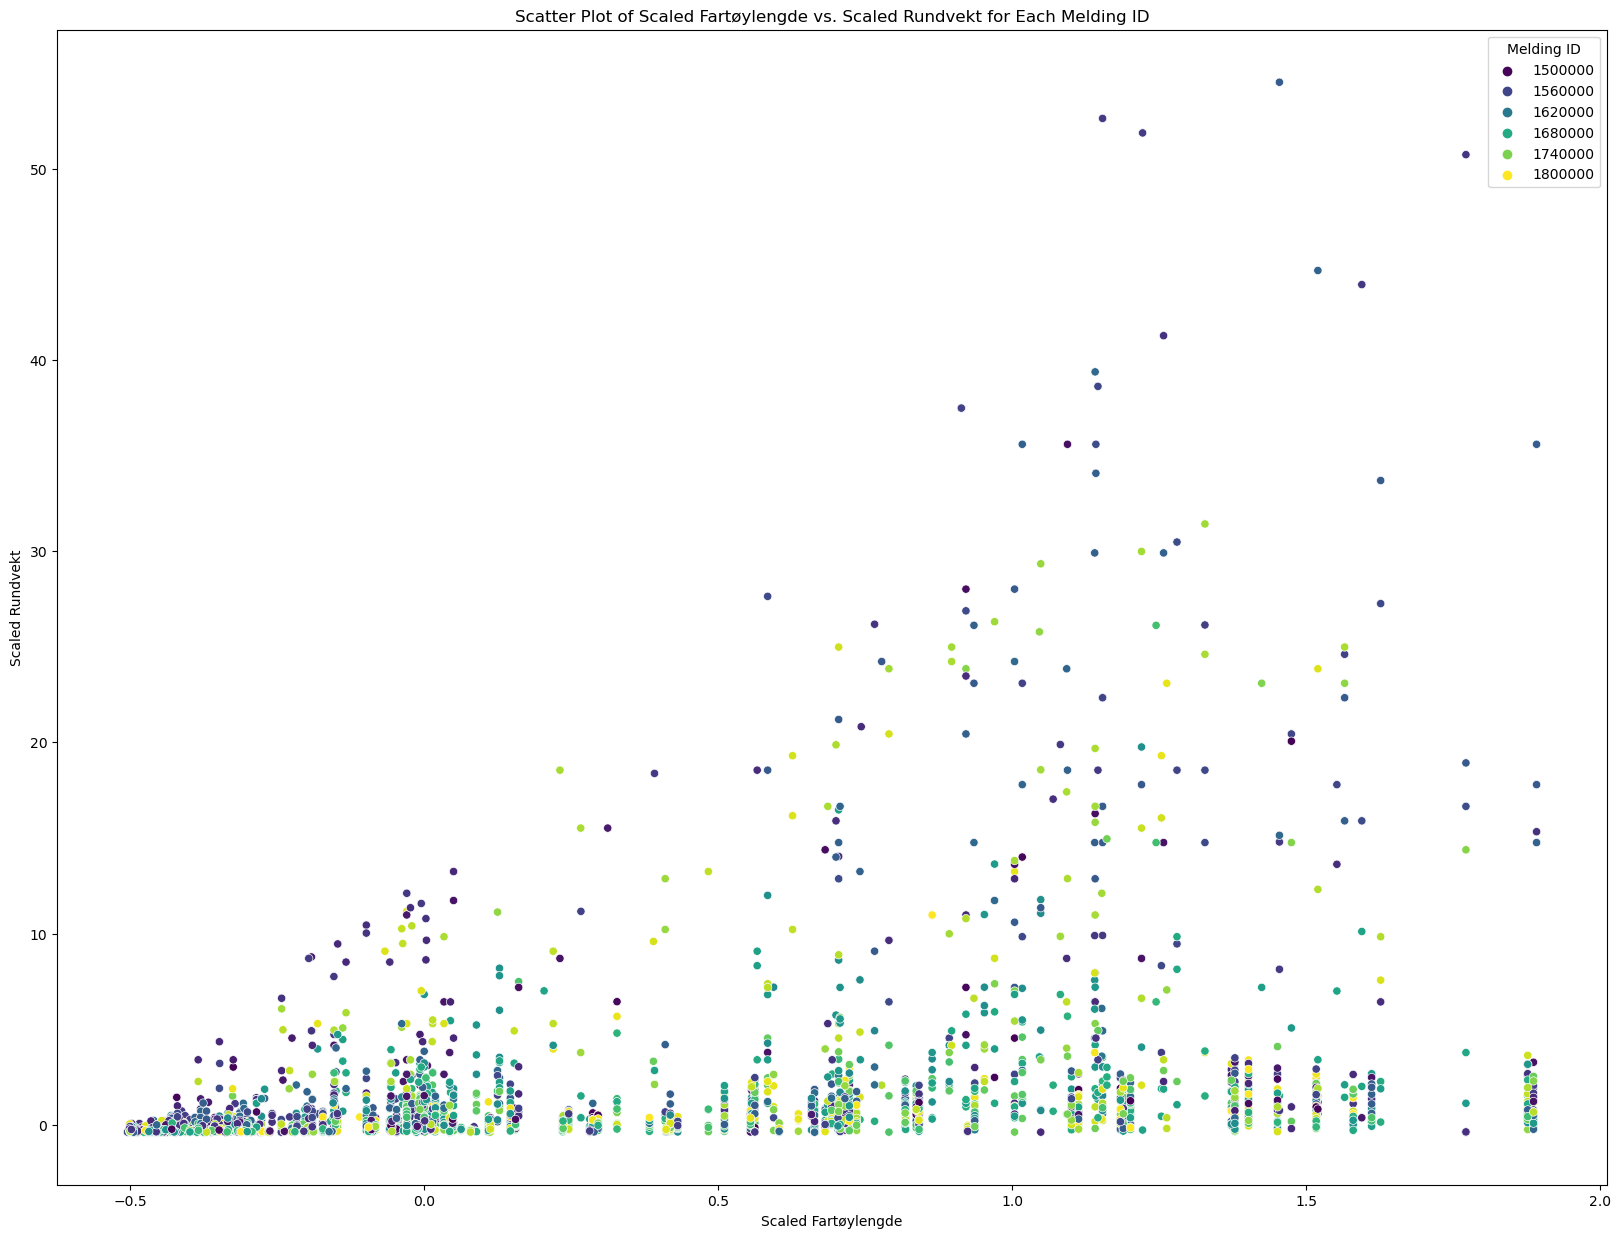

In [23]:
# Create a scatter plot using scaled_data
plt.figure(figsize=(20, 15))
sns.scatterplot(x='Scaled Size', y='Scaled Rundvekt', hue='Melding ID', data=scaled_data.sample(frac=0.1), palette='viridis')
plt.title('Scatter Plot of Scaled Fartøylengde vs. Scaled Rundvekt for Each Melding ID')
plt.xlabel('Scaled Fartøylengde')
plt.ylabel('Scaled Rundvekt')
plt.legend(title='Melding ID')
plt.show()

In [24]:
#We should also take in count that this is the area of the vessel, not its complete "size",
#but this is just for small represenation, there are also alot of other things that arent accurate by it,
#The purpose is just to get an idea how the data is spread, and work with it from there
#Since we also saw that the Bruttonottasje (the volume) for a lot of ships were missing 
# we instead used the width and length (area) to make the correlation between area and fish caugth among the groups.

In [25]:
# Define a function to calculate total weight for each species within each group
def calculate_total_weight(subgroup):
    return subgroup.groupby('Art - FDIR')['Rundvekt'].sum().reset_index()

# Apply the calculation function within each group
grouped_species_totals = grouped_data.apply(calculate_total_weight)

# Reset the index to obtain a DataFrame
grouped_species_totals_reset = grouped_species_totals.reset_index(drop=True)

# Calculate the most common species across all groups
most_common_species = grouped_species_totals_reset.groupby('Art - FDIR')['Rundvekt'].sum().sort_values(ascending=False).reset_index()
# Extract 'Rundvekt' column for scaling
rundvekt_column = most_common_species[['Rundvekt']]

# Reshape the array to 2D before scaling
rundvekt_values = rundvekt_column.values.reshape(-1, 1)

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data for rundvekt
scaled_rundvekt = scaler.fit_transform(rundvekt_values)

# Replace the 'Rundvekt' column with the scaled values in the DataFrame
most_common_species['Rundvekt'] = scaled_rundvekt.flatten()
most_common_species

Art - FDIR    Rundvekt
0               Sild  553.501891
1            Kolmule  512.190447
2              Torsk  291.857609
3              Lodde  244.965436
4            Makrell  226.948124
..               ...         ...
113      Trollkrabbe   -0.021735
114          Isskate   -0.021745
115  Sanktpetersfisk   -0.021745
116  Vanlig fløyfisk   -0.021751
117               Ål   -0.021758

[118 rows x 2 columns]

In [26]:
range_of_common = 5 # how many of the most common should we keep, and the rest will be "other"

In [27]:
grouped_species_most_common = most_common_species[:range_of_common] # the most common fishes, some range so that the model dosent get to complex.
grouped_species_other_common = most_common_species[range_of_common:] # Other fishes, these will be classified as just "other"

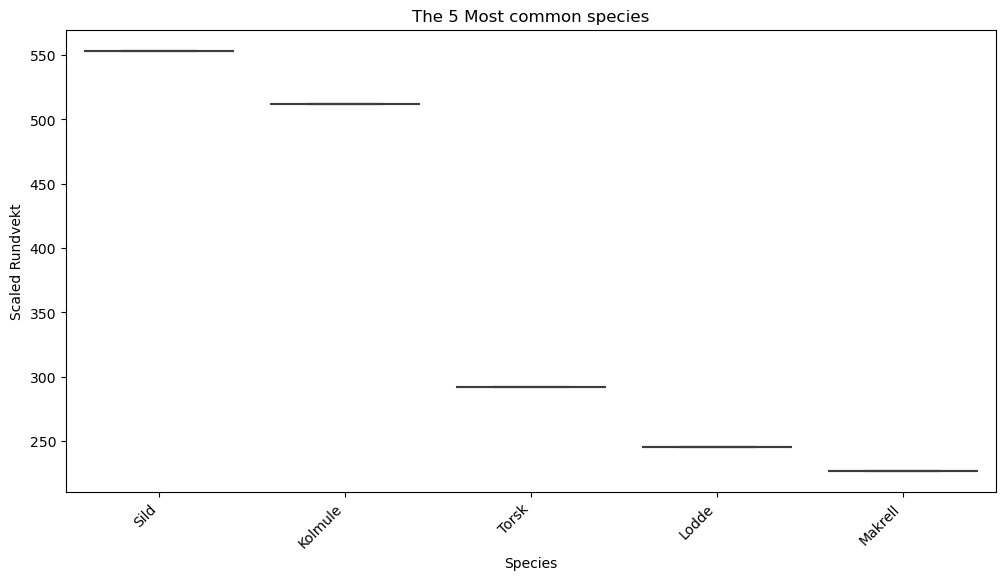

In [28]:
# Create a boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Art - FDIR', y='Rundvekt', data=grouped_species_most_common)
plt.xlabel('Species')
plt.ylabel('Scaled Rundvekt')
plt.title(f'The {range_of_common} Most common species')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

In [29]:
from collections import Counter
# Assuming you have a DataFrameGroupBy object named grouped_data
# Example: grouped_data = df.groupby(['ExistingGroupColumn'])

# Define a function to count occurrences of each tool across all groups
def count_tools_across_groups(subgroup):
    # Use Counter to count occurrences of each tool within the subgroup
    tool_counter = Counter(subgroup['Redskap FAO'])
    
    return tool_counter

# Apply the counting function across all groups
tools_counter = grouped_data.apply(count_tools_across_groups)

# Combine counters from all groups
combined_counter = Counter()
for counter in tools_counter:
    combined_counter.update(counter)

# Create a DataFrame with the most common tools and their counts
most_common_tools_df = pd.DataFrame(list(combined_counter.items()), columns=['Tool', 'Count'])

# Sort the DataFrame by count in descending order
most_common_tools_df = most_common_tools_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
# Extract 'Rundvekt' column for scaling

count_coloumn = most_common_tools_df[['Count']]

# Reshape the array to 2D before scaling
count_values = count_coloumn.values.reshape(-1, 1)

# Fit and transform the data for rundvekt
scaled_counts = scaler.fit_transform(count_values)

# Replace the 'Rundvekt' column with the scaled values in the DataFrame
most_common_tools_df['Count'] = scaled_counts.flatten()
most_common_tools_df


Tool      Count
0                          Bunntrål, otter  10.830463
1                        Snurrevad, skotsk   2.936647
2                              Andre liner   2.111086
3                           Bunntrål, reke   1.793633
4                                Setteline   1.547274
5                                Snurrevad   1.222309
6   Gillnets and entangling nets (unspec)*   1.090472
7                         Bunntrål (uspes)   0.986761
8                                   Teiner   0.430279
9             Snurpenot/ringnot, et fartøy   0.375401
10                          Udefinert garn   0.251718
11                           Bunntrål, par   0.107329
12                        Otter dobbeltrål   0.079020
13                 Flytetrål, uspesifisert   0.015529
14            Snurpenot/ringnot, to fartøy   0.010490
15                        Flytetrål, otter  -0.010490
16                       Snurpenot/ringnot  -0.028630
17                          Flytetrål, par  -0.046496
18        Boat /vessel seines -Pair seines  -0.106871
19                         Flytetrål, reke  -0.110994
20                               Settegarn  -0.120980
21                    Encircling gillnets*  -0.148374
22                             Harpun,div.  -0.153688
23                   Partrål, uspesifisert  -0.156711
24                  Annen trål (udefinert)  -0.158452
25                                  Ukjent  -0.163216
26                        Snurrevad, dansk  -0.173385
27                     Juksa/pilk, manuell  -0.178607
28                          Dorg/harp/snik  -0.178974
29                          Udefinert trål  -0.179615

In [30]:
grouped_tool_most_common = most_common_tools_df[:range_of_common]
grouped_tool_other_common = most_common_tools_df[range_of_common:]

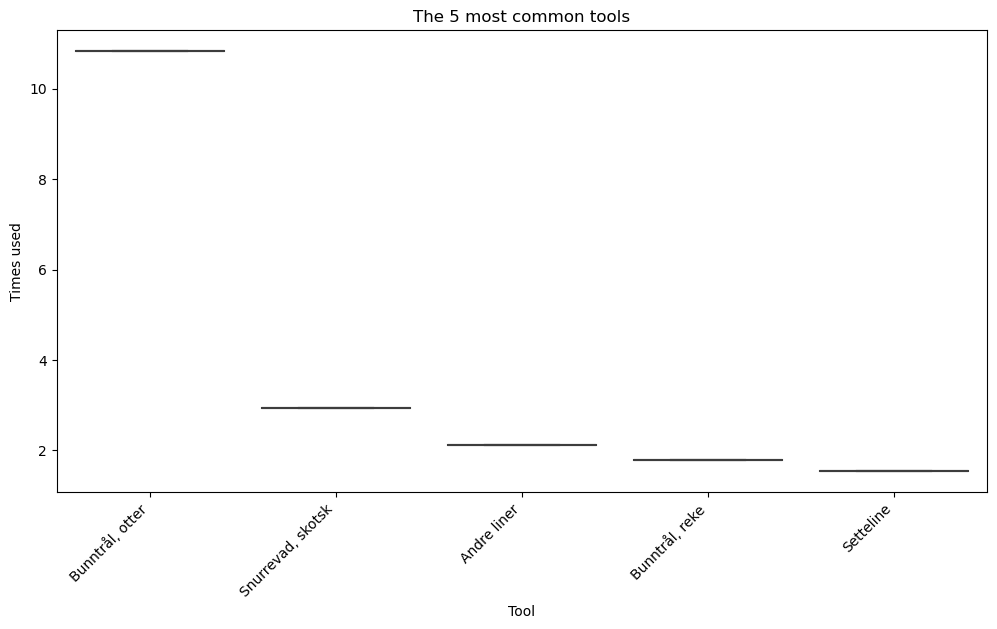

In [31]:
# Create a boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tool', y='Count', data=grouped_tool_most_common)
plt.xlabel('Tool')
plt.ylabel('Times used')
plt.title(f'The {range_of_common} most common tools')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

In [32]:
nan_counts = grouped_data.apply(lambda x: x.isna().sum())

In [33]:
# Assuming nan_counts.sum() returns a Series with column names and their total NaN counts
total_nan_counts = nan_counts.sum()

# Create a DataFrame with columns 'Column' and 'Count'
most_common_nan_counts = pd.DataFrame({'Column': total_nan_counts.index, 'Count': total_nan_counts.values})


In [34]:
most_common_nan_counts.sum()

Column    Melding IDStartposisjon breddeStartposisjon le...
Count                                                     0
dtype: object

In [35]:
#Now that we dont have any NaN values, we can continue, keeping in mind of some "uknown values", and "0" values 
# these are contextual sentual though, since it dosent make sense that a ship has a width of "0" or the tools used (equipment)
# is "Uknown", so we can later see when model building if these things will be changed, but for now, we continue forward:

In [36]:
import numpy as np

grouped_data_df = grouped_data.apply(lambda x: x.head(1)).reset_index(drop=True).sample(frac=1)

In [37]:
grouped_data_df.reset_index(inplace=True)
grouped_data_df = pd.merge(grouped_data_df, scaled_data, on='Melding ID', suffixes=('_grouped_data', '_total_catch'))

In [47]:
grouped_data_df['Species_Classification'] = np.where(
    grouped_data_df['Hovedart FAO'].isin(grouped_species_most_common["Art - FDIR"]),
    grouped_data_df['Hovedart FAO'],
    'Other'
)
# replacing the values, so that "Hovedart FAO" and "Art - FDIR" are the same in all cases
grouped_data_df['Art - FDIR'] = grouped_data_df['Art - FDIR'].replace({
    'Reke av  Palaemonidaeslekten': 'Reke av  Palaemonidaefamilien',
    'Hakes nei *': 'Hakes nei. *',
    'Annen vanlig ti-armet blekksprut': 'Various squids nei *',
    'Pink cusk-eel *' : 'Pink cusk-eel*'
})
main_fish_rows = grouped_data_df[grouped_data_df['Hovedart FAO'] == grouped_data_df['Art - FDIR']]

grouped_data_df['Main Fish Weight'] = main_fish_rows['Rundvekt']


mismatched_rows = grouped_data_df[grouped_data_df['Hovedart FAO'] != grouped_data_df['Art - FDIR']]
for index in mismatched_rows.index:
   
    group_size = grouped_data_df.loc[grouped_data_df.index == index].shape
    print(f"Group at index {index} has size: {group_size}")

    
    art_fdir_value = grouped_data_df.at[index, 'Art - FDIR']
    print(f"Art FDIR value for this row: {art_fdir_value}")
    
    print(art_fdir_value == grouped_data_df.at[index, 'Hovedart FAO'])
    print(art_fdir_value)
    print(grouped_data_df.at[index, 'Hovedart FAO'])
    
    print("\n") 

In [48]:
grouped_data_df.columns

Index(['index', 'Melding ID', 'Startposisjon bredde', 'Startposisjon lengde',
       'Hovedområde start', 'Hovedområde stopp', 'Redskap FAO', 'Hovedart FAO',
       'Art FAO', 'Art - FDIR', 'Art - gruppe', 'Rundvekt', 'Lengdegruppe',
       'Bredde', 'Fartøylengde', 'Scaled Rundvekt', 'Scaled Size',
       'Non_scaled_Rundvekt', 'Species_Classification', 'Main Fish Weight'],
      dtype='object')

In [49]:
print(grouped_data_df['Art - FDIR'].unique())
print(grouped_species_most_common)
print(grouped_data_df["Main Fish Weight"])

['Sei' 'Torsk' 'Hyse' 'Dypvannsreke' 'Sild' 'Tobis og annen sil' 'Brosme'
 'Snabeluer' 'Lange' 'Øyepål' 'Snøkrabbe' 'Raudåte' 'Lysing' 'Blåkveite'
 'Kveite' 'Kolmule' 'Makrell' 'Lyr' 'Hvitting' 'Flekksteinbit' 'Breiflabb'
 'Lodde' 'Reke av  Pandalusslekten' 'Taskekrabbe' 'Uer (vanlig)'
 'Hestmakrell' 'Lanternfishes nei *' 'Vågehval' 'Brisling' 'Vassild'
 'Rødspette' 'Steinbiter' 'Reke av  Palaemonidaefamilien'
 'Strømsild/Vassild' 'Strømsild' 'Sjøkreps' 'Annen skate og rokke'
 'Pink cusk-eel*' 'Gråsteinbit' 'Blåsteinbit' 'Blålange' 'Glassvar'
 'Hakes nei. *' 'Laksesild' 'Annen marin fisk' 'Akkar' 'Makrellstørje'
 'Smørflyndre' 'Pigghå' 'Kongekrabbe' 'Skjellbrosme' 'Sølvtorsk'
 'Rognkjeks (felles)' 'Lomre' 'Various squids nei *' 'Havmus'
 'Annen flyndre' 'Gapeflyndre' 'Skrubbe']
  Art - FDIR    Rundvekt
0       Sild  553.501891
1    Kolmule  512.190447
2      Torsk  291.857609
3      Lodde  244.965436
4    Makrell  226.948124
0         12079.0
1          3877.0
2           364.0
3      

In [50]:
grouped_species_most_common["Art - FDIR"]

0       Sild
1    Kolmule
2      Torsk
3      Lodde
4    Makrell
Name: Art - FDIR, dtype: object

In [51]:
grouped_data_df['Species_Classification']

0        Other
1        Torsk
2        Other
3        Other
4        Torsk
         ...  
46356    Other
46357    Torsk
46358    Other
46359    Other
46360     Sild
Name: Species_Classification, Length: 46361, dtype: object

In [52]:
grouped_data_df["Main Fish Weight"].isna().sum()

0

In [53]:
fig = px.density_mapbox(
    grouped_data_df, 
    lat='Startposisjon bredde', 
    lon='Startposisjon lengde', 
    z='Scaled Rundvekt',
    hover_data=['Melding ID','Species_Classification'],
    radius=10,
    zoom=3,
    height=300
)



fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r": 0, "t": 0, "l": 0, "b": 0}
)
fig.show()

In [54]:
# DONT RUN YET:
sampled_data = grouped_data_df.sample(frac=0.05) 
fig = px.scatter_geo(
    sampled_data, 
    lat='Startposisjon bredde', 
    lon='Startposisjon lengde', 
    color="Species_Classification", 
    hover_name="Melding ID", 
    size="Main Fish Weight", 
    projection="natural earth",
    scope="europe"  
)

fig.show()

In [55]:
#Now we should start getting our data more ready for our cluster methods, first